# Projeto de K Nearest Neighbors

# Dados de Sonar

## Detectando pedras e/ou minas

O sonar é uma técnica que usa som (ondas), normalmente embaixo da água, para navegar, se comunicar ou detectar objetos.

O conjunto de dados contém as métricas de resposta para 60 frequências separadas de sonar enviadas contra um campo de minas e pedras conhecido. Essas frequências são então nomeadas de acordo com o objeto em que o som acertou.

Nosso objetivo é criar um modelo de machine learning capaz de detectar a diferença entre uma pedra ou uma mina baseado na resposta das 60 frequências do sonar.

Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Vamos carregar os dados

In [2]:
df = pd.read_csv('C:\\Users\\henri/pythonNotebooks/DATA/sonar.all-data.csv')

In [121]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


## Exploração de dados

Primeiro vamos criar um heatmap da correlação entre as diferenças de resposta das frequências

<AxesSubplot:>

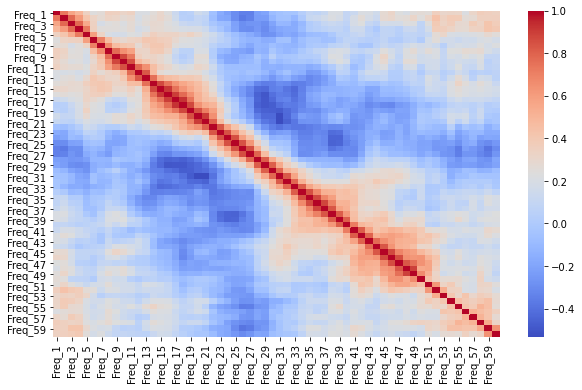

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm')

Vamos ver quais as 5 frequências que possuem maior correlação com a coluna 'Label'. Para isso mapeamos os dados de 'Label' para 0s e 1s e criamos uma nova coluna chamada 'Target'.

In [38]:
df['Target'] = df['Label'].map({'R':0, 'M':1})

In [42]:
df.corr().sort_values('Target').tail(6)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Target
Freq_45,0.279968,0.285716,0.180734,0.087824,0.089202,0.085468,0.110813,0.240176,0.320573,0.287459,...,0.350208,0.181292,0.162879,0.242757,0.170750,0.144281,0.167337,0.178402,0.157181,0.339406
Freq_10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,0.341142
Freq_49,0.247560,0.313995,0.223074,0.133294,0.088128,0.080729,0.194720,0.271422,0.222135,0.264885,...,0.319286,0.150871,0.195826,0.230033,0.155186,0.173098,0.328238,0.209152,0.088640,0.351312
Freq_12,0.210861,0.194102,0.214807,0.175381,0.211657,0.344451,0.274432,0.328329,0.363404,0.485392,...,0.117699,0.042263,0.078457,0.164590,0.115658,0.030732,0.065273,0.044614,0.071364,0.392245
Freq_11,0.344058,0.297065,0.274610,0.271881,0.231684,0.333570,0.396588,0.584583,0.728063,0.853140,...,0.165748,0.084801,0.142572,0.228991,0.122332,0.103405,0.193358,0.067726,0.089695,0.432855
Target,0.271694,0.231238,0.192195,0.250638,0.222232,0.132327,0.114748,0.189314,0.321448,0.341142,...,0.288651,0.141871,0.182687,0.095639,0.129341,0.000933,0.184191,0.130826,0.090055,1.000000


## Train Test Split

Faremos agora um train_test_split nos dados. Primeiro deve-se separar os dados em features e labels.

In [48]:
X = df.drop(labels=['Target','Label'],axis=1)

In [79]:
y = df['Label']

In [47]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Importamos StandarScaler para escalonar nossos dados e KNeighborsClassifier que servirá de modelo para classificar o alvo das ondas. Fazemos uso de um Pipeline para realizar as duas operações (escalonar e fitar os dados).

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
scaler = StandardScaler()

In [82]:
knn = KNeighborsClassifier()

In [83]:
operations = [('scaler',scaler),('knn',knn)]

In [57]:
from sklearn.pipeline import Pipeline

In [84]:
pipe = Pipeline(operations)

Com um GridSearch procuramos qual o melhor valor de k para o qual KNeighborsClassifier é mais eficiente.

In [59]:
from sklearn.model_selection import GridSearchCV

In [85]:
k_values = np.arange(1,30)

In [86]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [87]:
param_grid = {'knn__n_neighbors':k_values}

In [88]:
grid_model = GridSearchCV(estimator=pipe,param_grid=param_grid,
                         cv=5,scoring='accuracy')

Com o GridSearch criado podemos fitar os dados de treinamento e ver quais os melhores parâmetros que foram encontrados.

In [89]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

Vemos que o melhor valor de k é 1 e a métrica usada para medir as distâncias dos dados foi a de minkowski.

In [90]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Podemos ver o comportamento da acurácia em função dos valores de K.

In [92]:
score = grid_model.cv_results_['mean_test_score']

In [93]:
score

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

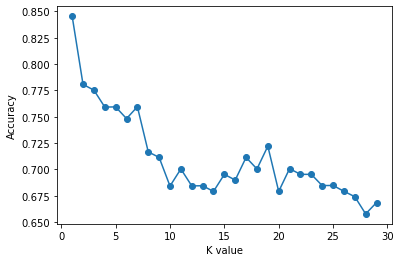

In [152]:
plt.plot(k_values,score, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')

Finalmente, checamos a performance do modelo que criamos

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [153]:
y_pred = grid_model.predict(X_test)

In [100]:
confusion_matrix(y_test,y_pred) # Vemos que houve apenas 2 valores que foram classificados de forma errada

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



Agora vamos criar uma amostra para ver como o modelo o classifica.

In [162]:
sample = pd.DataFrame(np.random.random(size=(1,60)))

In [163]:
sample

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.222516,0.297566,0.813457,0.561085,0.574562,0.863797,0.099994,0.883532,0.216648,0.348896,...,0.251932,0.673888,0.888065,0.737262,0.070979,0.223358,0.256574,0.541928,0.442406,0.155804


In [165]:
grid_model.predict(sample) # M = Mina

array(['M'], dtype=object)